#### Baseline approach:

This is a weak inference based approach which considers local neighborhood information to infer that whether a particular cell is a mine or not. 

In [0]:
# Import libraries

import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
import pprint as pp
from operator import itemgetter
from matplotlib.colors import ListedColormap
import pdb

In [0]:
# Randomly sets n mines in the enviornment grid

def set_mines(grid, n):
  
  count = 0
  d = grid.shape[0]
  
  while count < n:
    (i, j) = (random.randint(0, d - 1), random.randint(0, d - 1))
    if grid[(i,j)] == 0:
      grid[(i,j)] = -1
      count += 1
  return grid

In [0]:
def check_neighbor_validity(neighbor,d):
  
  # If dimensions are in the range
  if neighbor[0] == -1 or neighbor[1] == -1 or neighbor[0] == d or neighbor[1] == d:
    return False    
  else:
    return True

In [0]:
def count_mines(grid, cell):
  
  d = grid.shape[0]
  count = 0
  i = cell[0]
  j = cell[1]
  neighbors = [(i - 1, j - 1), (i - 1, j), (i - 1, j + 1), (i, j - 1), (i, j + 1), (i + 1, j - 1), (i + 1, j), (i + 1, j + 1)]
  
  for neighbor in neighbors:
    if check_neighbor_validity(neighbor,d):
      if grid[neighbor] == -1:
        count += 1
  return count

In [0]:
# Sets the values of the cells in the environemnt grid depending on the mines present in the cell's neighborhood

def set_values(grid, d):
  
  for i in range(d):
    for j in range(d):
      if grid[(i, j)] != -1:
        value = count_mines(grid, (i, j))
        grid[(i, j)] = value
  return grid

In [0]:
def generate_grid(d, n):
  
  grid = np.zeros((d, d))
  grid = set_mines(grid, n)
  grid = set_values(grid, d)
  return grid

#### Generating a sample minesweeper environment grid:

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  1.,  0.],
       [ 0.,  0.,  0., ..., -1.,  1.,  0.]])


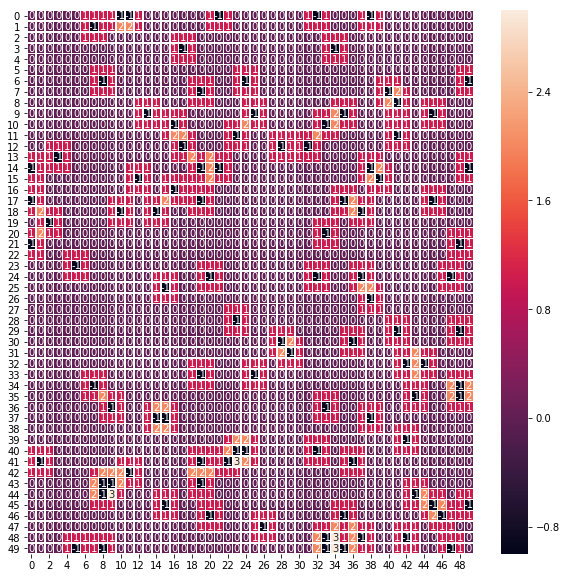

In [0]:
d = 50  # dimension
n = 100  # number of mines

grid = generate_grid(d, n)
pp.pprint(grid)

plt.figure(figsize = (10,10))
sns.heatmap(grid, annot=True,  linewidths=.5)
plt.show()

#### Function for visualizng the user inference grid: 

In [0]:
def draw_mine(grid):
  
  dim = grid.shape[0]
  
  flatui = ["black", "crimson",  "lightgray", "dimgray"]
  color_palette = sns.color_palette(flatui)
  plt.figure(figsize = (8,8))
  ax = sns.heatmap(grid, annot=True,  linewidths=.01, vmax = 16, vmin = -9, cmap=color_palette, center = 0,  linecolor = 'gray' , cbar = False, xticklabels = False, yticklabels = False) 
  
  for text in ax.texts:
    if text.get_text() == '0' or text.get_text() == '9':
        text.set_size(0)
        text.set_weight('bold')
        text.set_style('italic')
    if text.get_text() == '1':
        text.set_weight('bold')
        text.set_color('blue')
    if text.get_text() == '2':
        text.set_weight('bold')
        text.set_color('green')
    if text.get_text() == '3':
        text.set_weight('bold')
        text.set_color('crimson')
    if text.get_text() == '4':
        text.set_weight('bold')
        text.set_color('darkblue')
    if text.get_text() == '5':
        text.set_weight('bold')
        text.set_color('darkred')
    if text.get_text() == '6':
        text.set_weight('bold')
        text.set_color('olive')
    if text.get_text() == '7':
        text.set_weight('bold')
        text.set_color('midnightblue')
    if text.get_text() == '-1':
        text.set_weight('bold')
        text.set_color('white')
        text.set_text('F')
    if text.get_text() == '-9':
        text.set_weight('bold')
        text.set_color('white')
        text.set_text('M')
  
  plt.show()  

In [0]:
def open_empty_cell(env_grid, user_grid, cell, open_cells):
  
  assert env_grid[cell] == 0
  
  d = env_grid.shape[0]
  
  not_bounded = [cell]
  while not_bounded:
    (i, j) = not_bounded.pop()
    neighbors = [(i - 1, j - 1), (i - 1, j), (i - 1, j + 1), (i, j - 1), (i, j + 1), (i + 1, j - 1), (i + 1, j), (i + 1, j + 1)]
  
    for neighbor in neighbors:
      if( check_neighbor_validity(neighbor, d)):
        if(user_grid[neighbor] == 9):
          if( env_grid[neighbor] == 0):
            user_grid[neighbor] = 0
            not_bounded.append(neighbor)
          else:
            user_grid[neighbor] = env_grid[neighbor]
          open_cells.append(neighbor)

  
  return user_grid, open_cells

In [0]:
def random_pick(user_grid):
  
  while True:
    
    (i, j) = (random.randint(0, d - 1), random.randint(0, d - 1))
    if user_grid[(i,j)] == 9:
      return (i,j)

In [0]:
def explore_grid(env_grid, user_grid, cell, open_cells):
  
  (i,j) = cell
  
  neighbors = [(i - 1, j - 1), (i - 1, j), (i - 1, j + 1), (i, j - 1), (i, j + 1), (i + 1, j - 1), (i + 1, j), (i + 1, j + 1)]
  hidden = 0
  safe = 0
  mines = 0
  is_update = False
  n_valid_neighbors = 0
  d = env_grid.shape[0]
  
  for neighbor in neighbors:
    
    if(check_neighbor_validity(neighbor,d)):
      n_valid_neighbors =  n_valid_neighbors + 1
      if(user_grid[neighbor] == 9):
        hidden = hidden+1
      elif(user_grid[neighbor] == -1 or user_grid[neighbor] == -9):
        mines = mines + 1
      else:
        safe = safe + 1
  
  # Mines inferred
  if(user_grid[cell] - mines == hidden):
    
    for neighbor in neighbors:
       if(check_neighbor_validity(neighbor,d)):
          
          if(user_grid[neighbor] == 9):
            assert(env_grid[neighbor] == -1)
            user_grid[neighbor] = -1
            open_cells.append(neighbor)
            is_update = True
            
  # Safe cell inferred
  if( n_valid_neighbors - user_grid[cell] - safe == hidden):
    
    for neighbor in neighbors:
       if(check_neighbor_validity(neighbor,d)):
          if(user_grid[neighbor] == 9):
            
            assert(env_grid[neighbor] != -1)
            
            if(env_grid[neighbor] == 0):
                user_grid[neighbor] = 0
                open_empty_cell(env_grid, user_grid, neighbor, open_cells)
            else:
                user_grid[neighbor] = env_grid[neighbor]
            
            open_cells.append(neighbor)
            is_update = True
      
  return is_update

In [0]:
def baseline_approach(env_grid, num_mines):
  
  d = env_grid.shape[0]
  user_grid = np.full((d, d),9) 
  
  open_cells = []
  not_visited_list = []
  mine_blasts = 0
  
  for i in range(d):
    for j in range(d):
      not_visited_list.append((i,j))

  while(len(open_cells) < d*d):
      v = len(not_visited_list)
      v_cell = random.randint(0,v-1)
      selected_cell = not_visited_list[v_cell]
      
      if(env_grid[selected_cell] == 0):
          user_grid[selected_cell] = 0
          user_grid, open_cells = open_empty_cell(env_grid, user_grid, selected_cell, open_cells)
      else:
          user_grid[selected_cell] = env_grid[selected_cell]
          
      if env_grid[selected_cell] == -1:
          mine_blasts += 1
          user_grid[selected_cell] = -9

      open_cells.append(selected_cell)  
      
#       print("Random cell:", selected_cell)
      
#       print("New Grid")
#       draw_mine(user_grid)
      
      is_update = True
      
      while(is_update and len(open_cells) < d*d):
        is_update = False
        flag = False
        for cell in open_cells:
          if(user_grid[cell] > 0 ):
             flag = explore_grid(env_grid, user_grid, cell, open_cells)
          if(flag == True):
             is_update_1 = True
      not_visited_list = list(set(not_visited_list) - set(open_cells))
      
#       print("Updated Grid")
#       draw_mine(user_grid)

  return num_mines - mine_blasts

#### A demonstration of inference at each level: 

The user grid is visualized after a random restart and the updated user grid inferred from the algorithm. For visualization purposes, we have run this algorithm on a lower dimension. 
The mines marks as flags are the inferenced mines. The mines marked as 'M' are mines which are encountered during random restart. 

Note: To visualize the grid, uncomment the lines in *baseline_approach* method.
 

New Grid


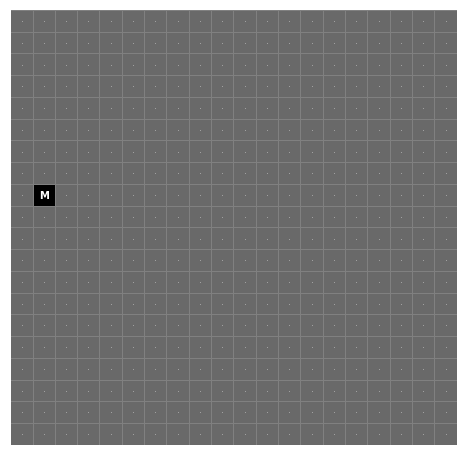

Updated Grid


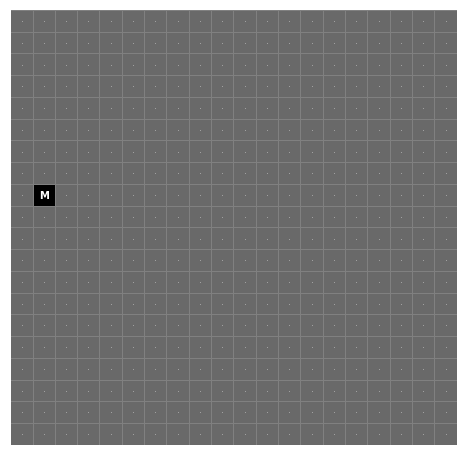

New Grid


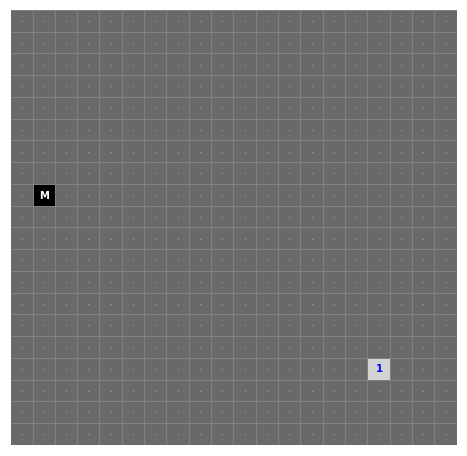

Updated Grid


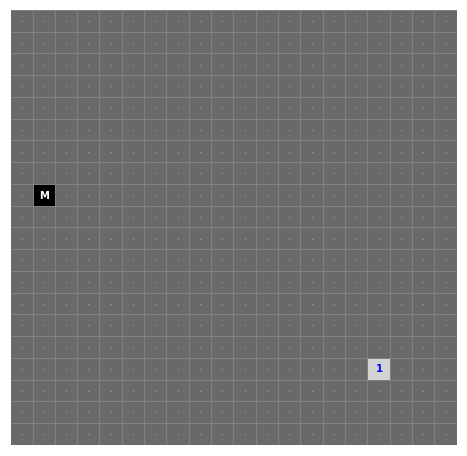

New Grid


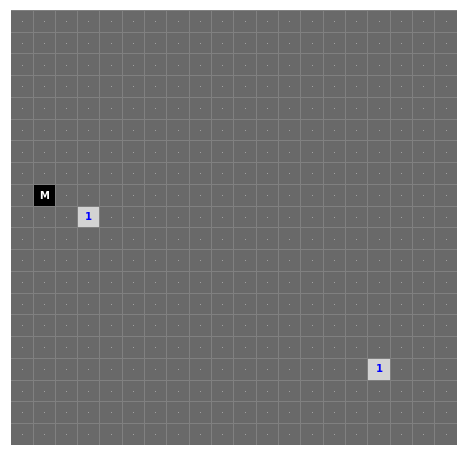

Updated Grid


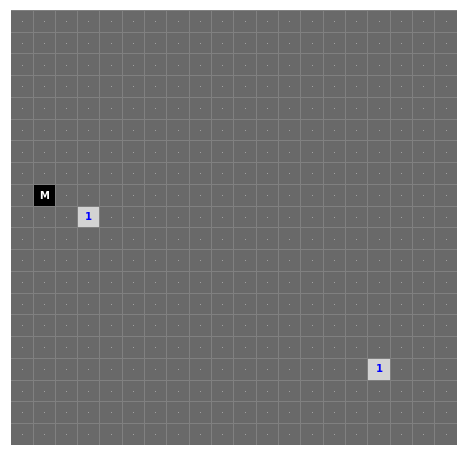

New Grid


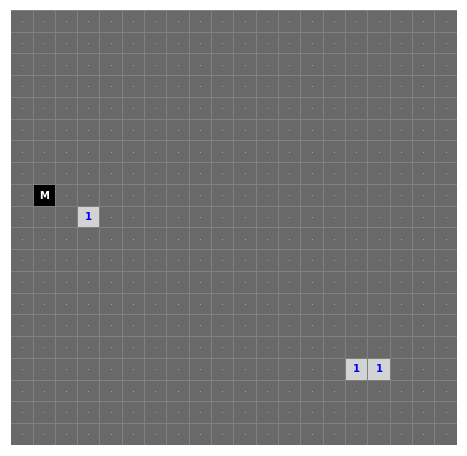

Updated Grid


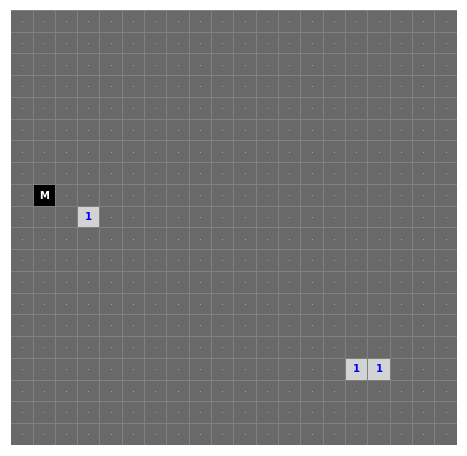

New Grid


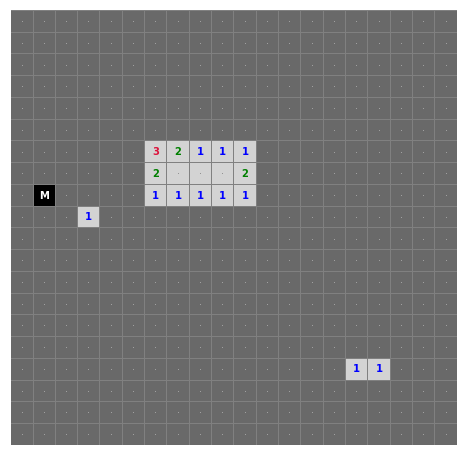

Updated Grid


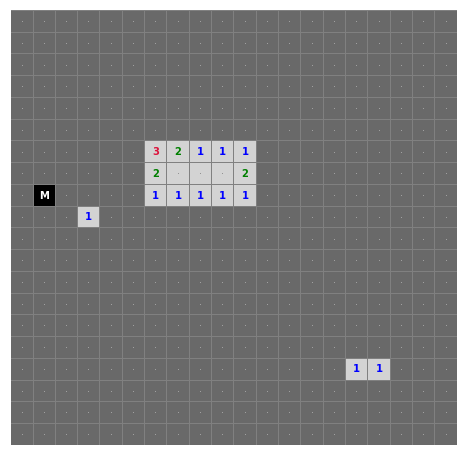

New Grid


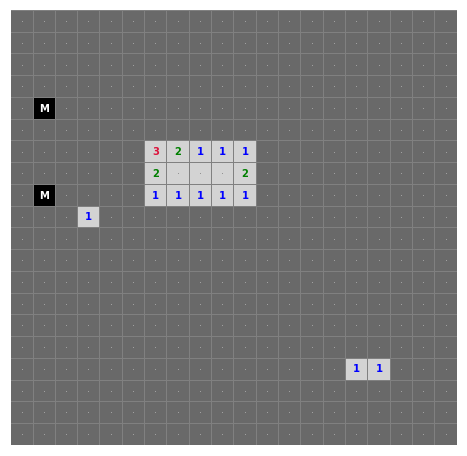

Updated Grid


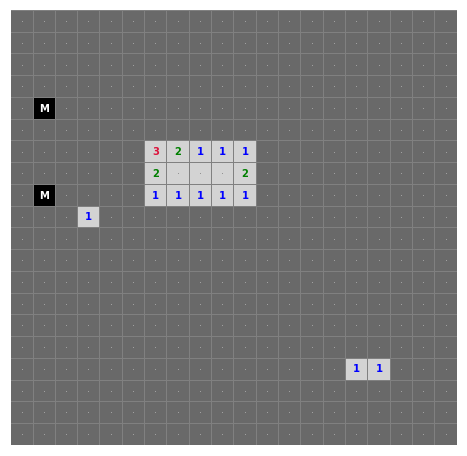

New Grid


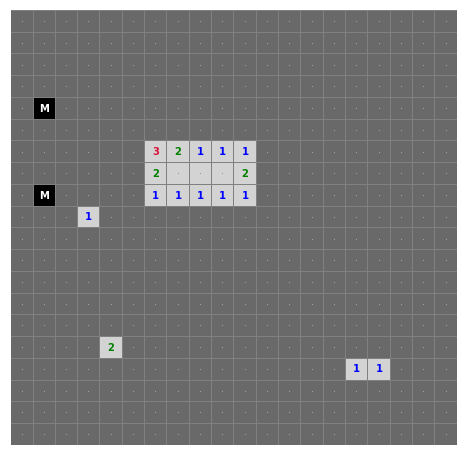

Updated Grid


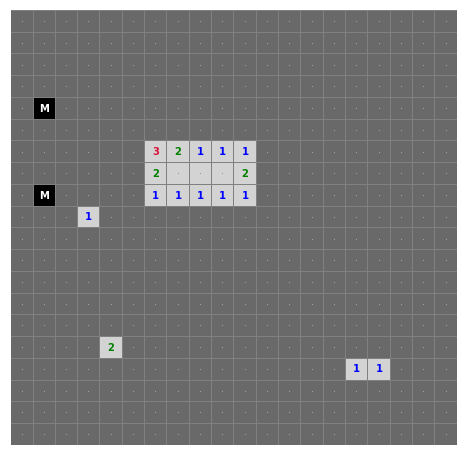

New Grid


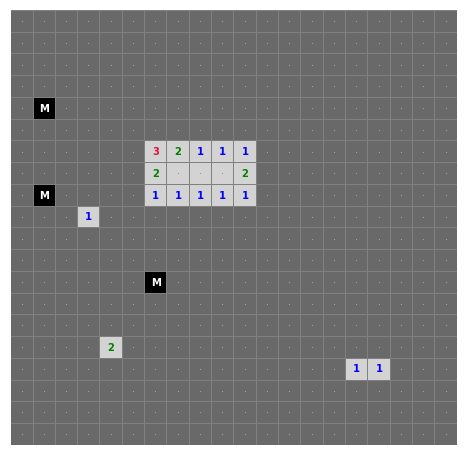

Updated Grid


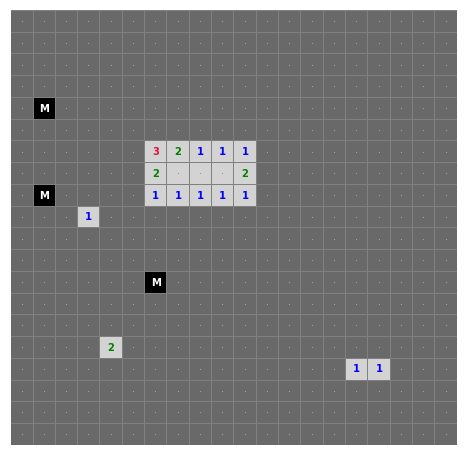

New Grid


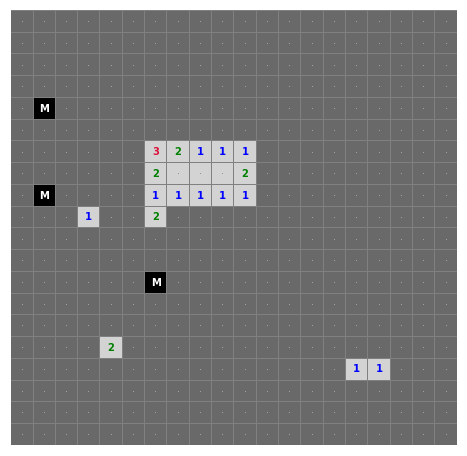

Updated Grid


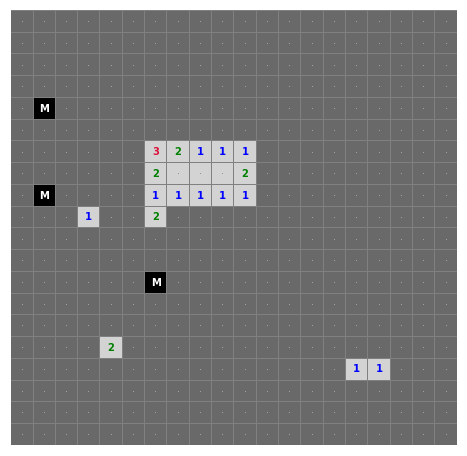

New Grid


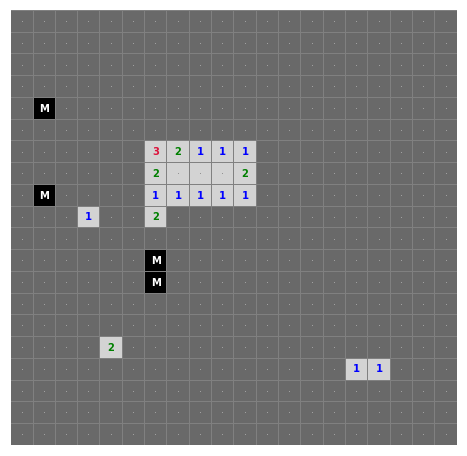

Updated Grid


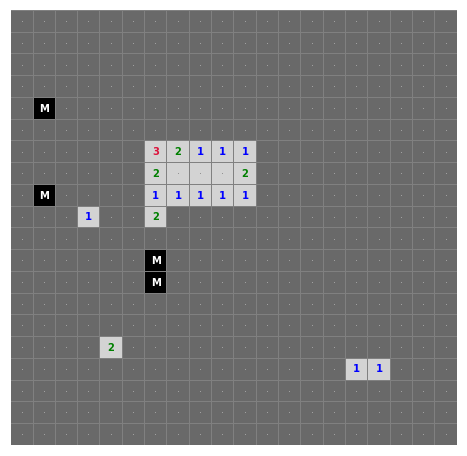

New Grid


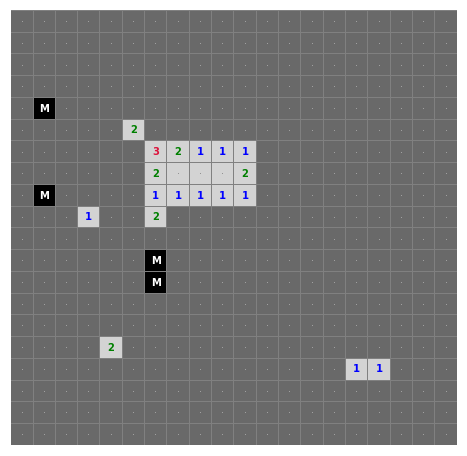

Updated Grid


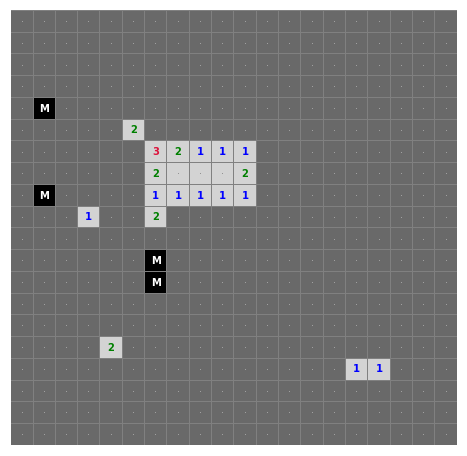

New Grid


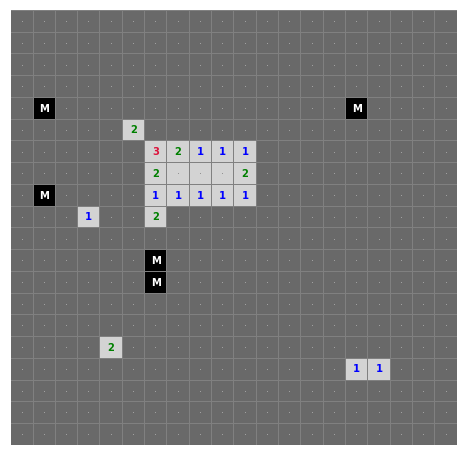

Updated Grid


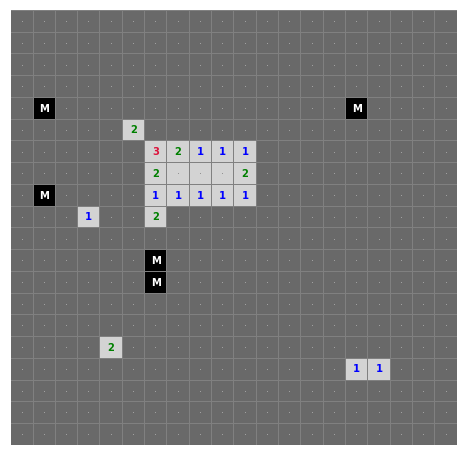

New Grid


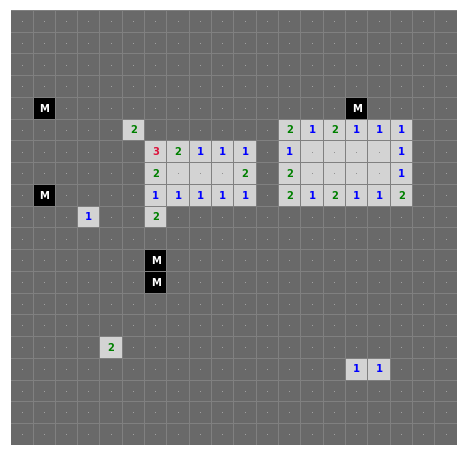

Updated Grid


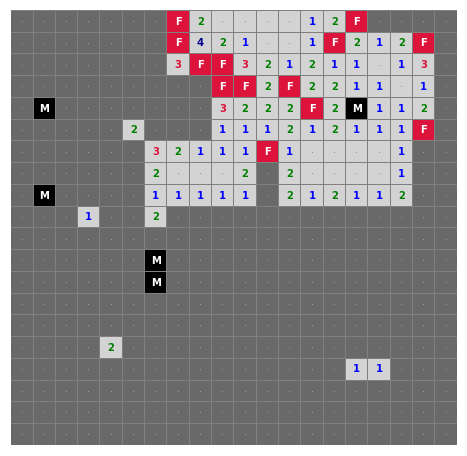

New Grid


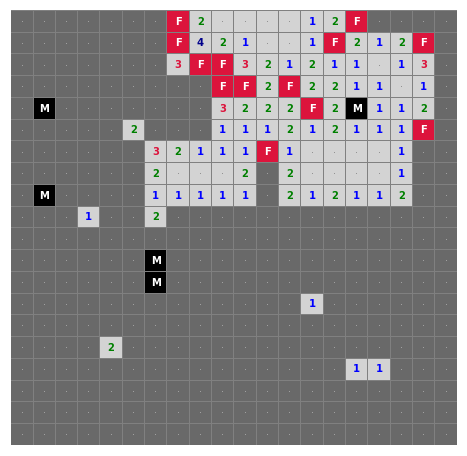

Updated Grid


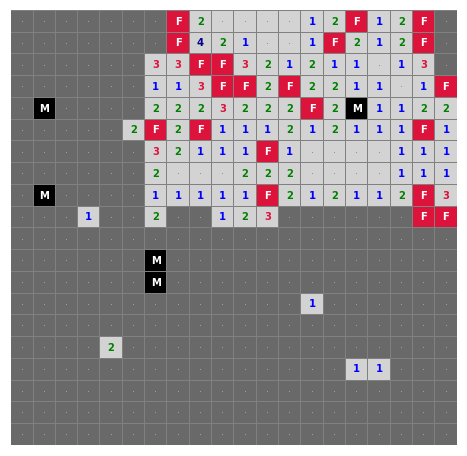

New Grid


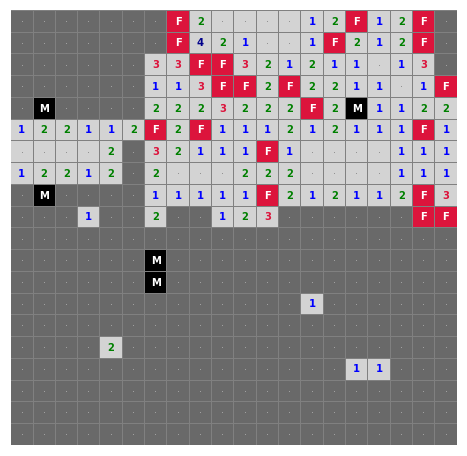

Updated Grid


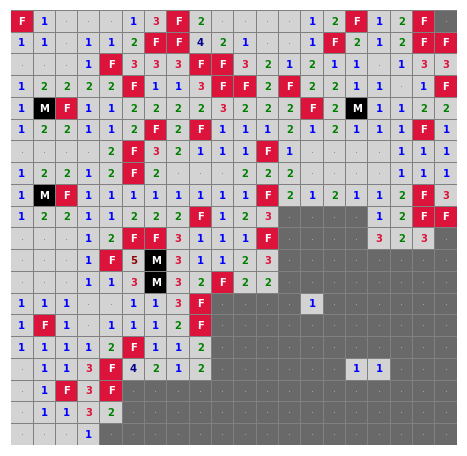

New Grid


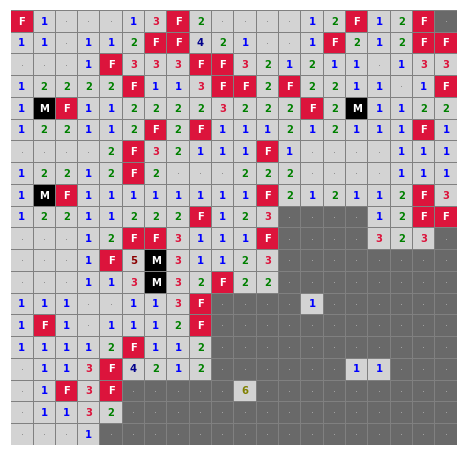

Updated Grid


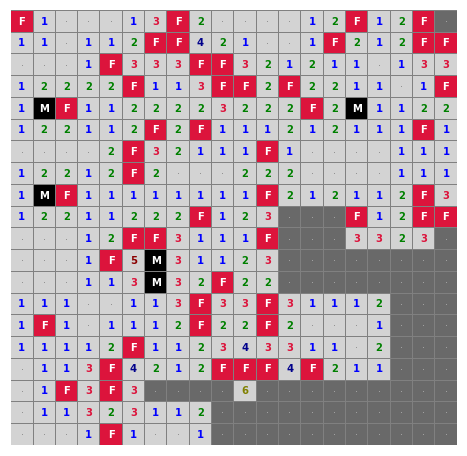

New Grid


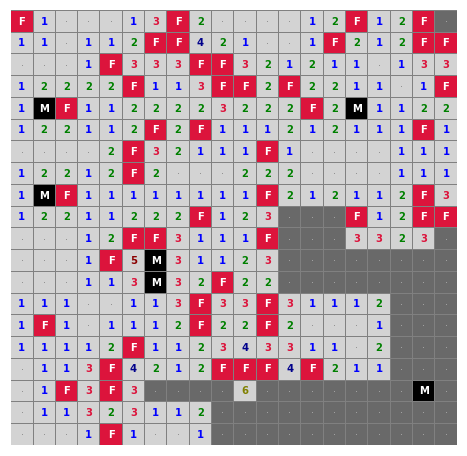

Updated Grid


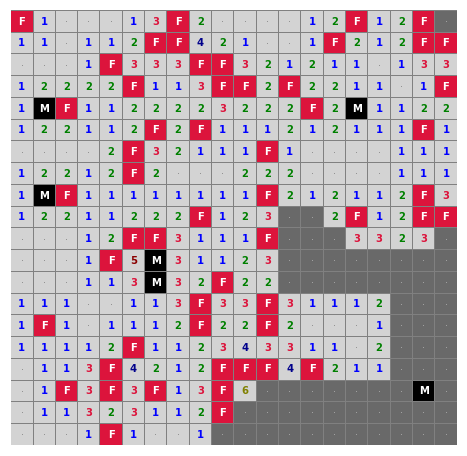

New Grid


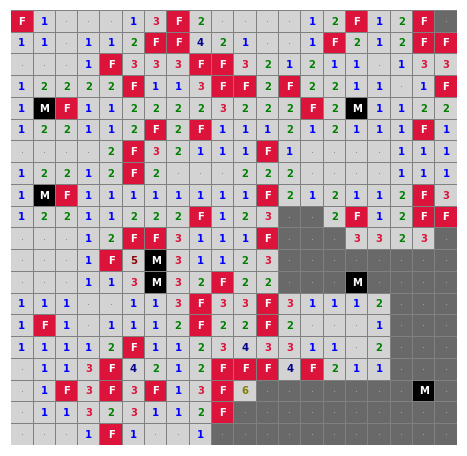

Updated Grid


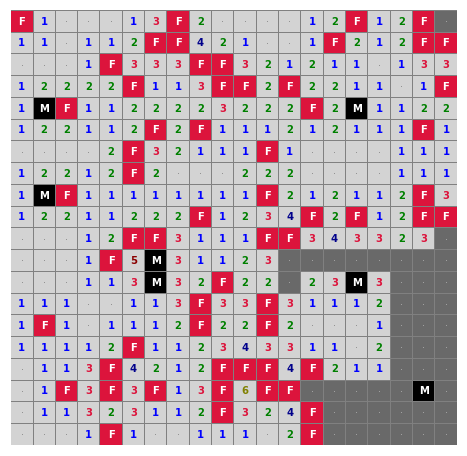

New Grid


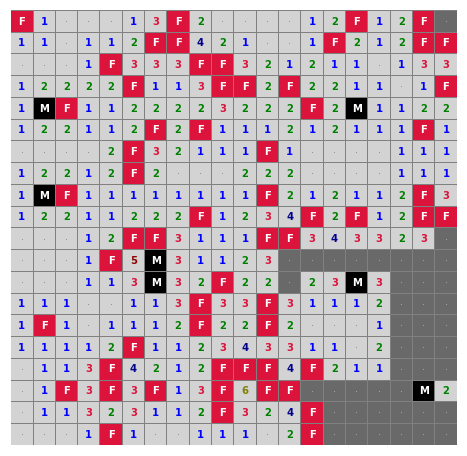

Updated Grid


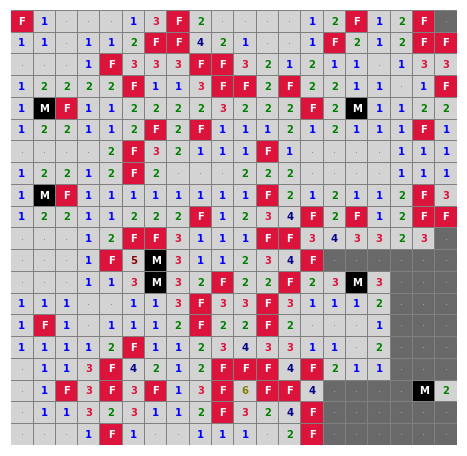

New Grid


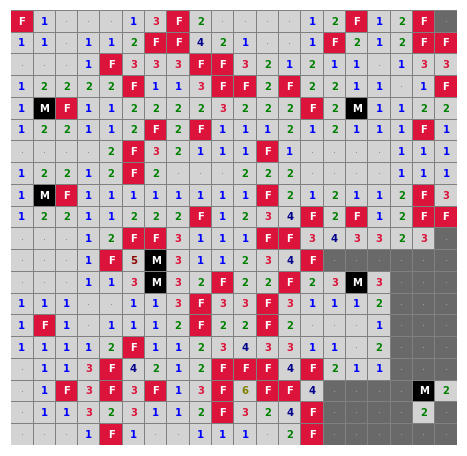

Updated Grid


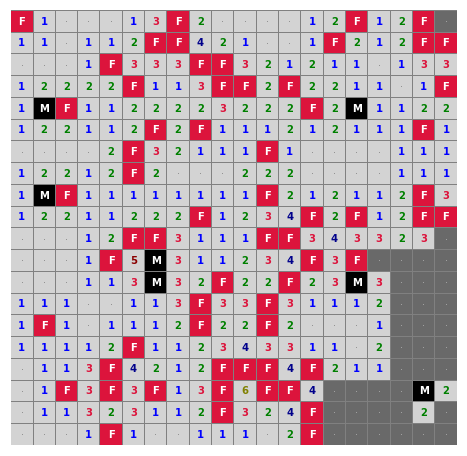

New Grid


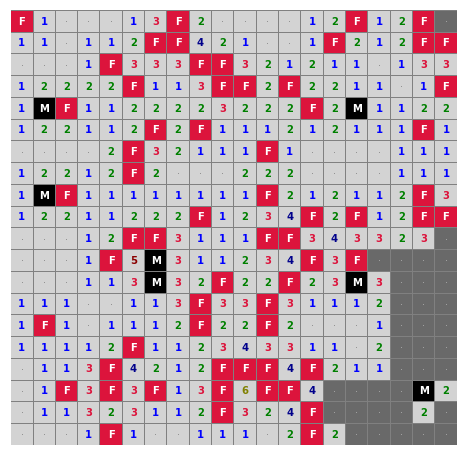

Updated Grid


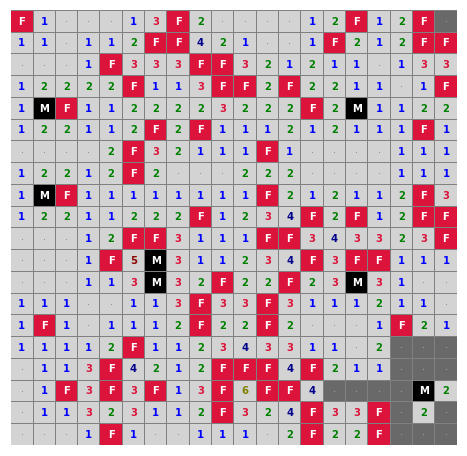

New Grid


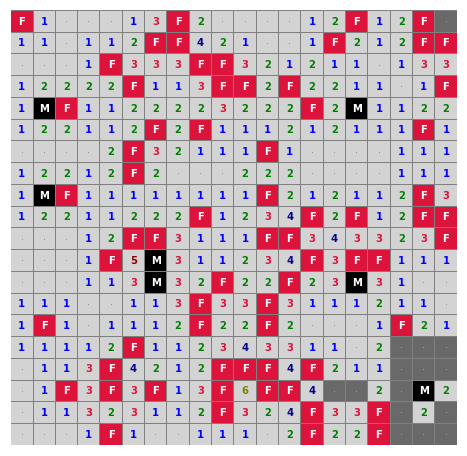

Updated Grid


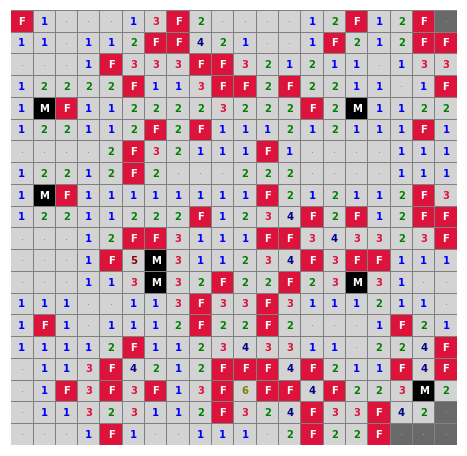

New Grid


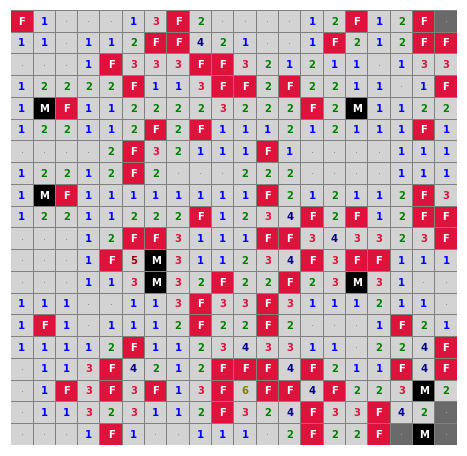

Updated Grid


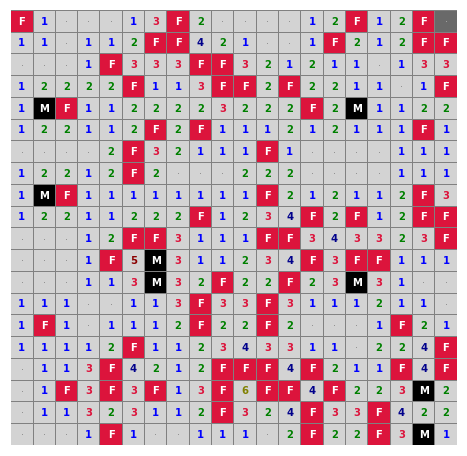

New Grid


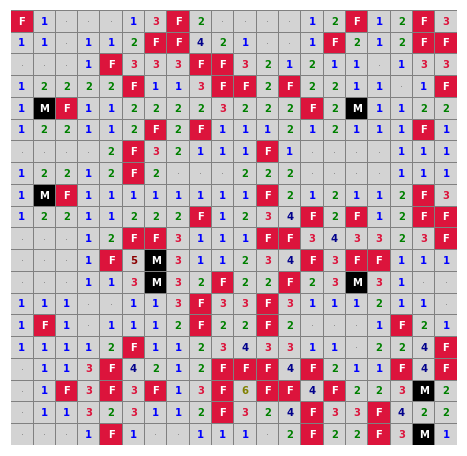

Updated Grid


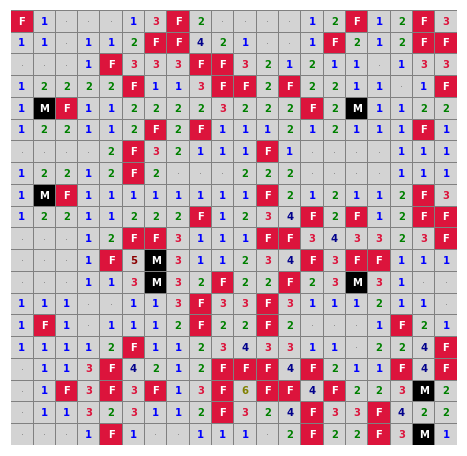

Score : 72
Time taken to solve a (20 * 20) grid with 80 mines = 52.27528953552246


In [0]:
start_time = time.time()
dim = 20
num_mines = 80

test_grid = generate_grid(dim, num_mines)
score = baseline_approach(test_grid,num_mines)
print("Score : " + str(score))
print("Time taken to solve a (" + str(dim) + " * " + str(dim) + ") grid with " + str(num_mines) + " mines = " + str(time.time()-start_time))

#### To find the average score and average time taken to solve a mine grid of 30x30 dimension and with 300 mines:

In [0]:
def solve_game(dim,num_mines):
  start_time = time.time()
  print("Without total mine count - Optimized approach")
  print("(" + str(dim) + " * " + str(dim) + ") grid with " + str(num_mines) + " mines:\n")

  avg_score = 0
  avg_time = 0

  for i in range(10):
    start_time = time.time()
    test_grid = generate_grid(dim, num_mines)
    score = baseline_approach(test_grid,num_mines)
    time_taken = time.time()-start_time
    avg_score += score
    avg_time += time_taken
    print(str(i) + ")\tScore: " + str(score) + "/" + str(num_mines) + "\tTime: " + str(time_taken))

  print("\nAverage - \tScore: " + str(avg_score/10) + "/" + str(num_mines) + "\tTime: " + str(avg_time/10))

In [0]:
solve_game(30,300)

Without total mine count - Optimized approach
(30 * 30) grid with 300 mines:

0)	Score: 214/300	Time: 0.8822650909423828
1)	Score: 230/300	Time: 0.8843405246734619
2)	Score: 217/300	Time: 0.9424014091491699
3)	Score: 199/300	Time: 0.8504486083984375
4)	Score: 219/300	Time: 0.9101512432098389
5)	Score: 230/300	Time: 0.9326341152191162
6)	Score: 220/300	Time: 0.8912849426269531
7)	Score: 229/300	Time: 0.8331809043884277
8)	Score: 221/300	Time: 0.7258591651916504
9)	Score: 218/300	Time: 0.7283585071563721

Average - 	Score: 219.7/300	Time: 0.8580924510955811


#### To find the average score for different mine densities: 

In [0]:
def average_score(dim):
  
  num_cells = dim*dim
  mine_density = [int(num_cells*0.1), int(num_cells*0.2), int(num_cells*0.3), int(num_cells*0.4), int(num_cells*0.5)]
  avg_score = []
  
  for num_mines in mine_density:
    
    start_time = time.time()
    sum_score = 0
    num_iteration = 10
    
    for i in range(num_iteration):
      
      env_grid = generate_grid(dim, num_mines)
      score = baseline_approach(env_grid,num_mines)   
      sum_score = sum_score + score
      
    avg_score_temp = sum_score/num_iteration
    avg_score_temp = (avg_score_temp/num_mines)*100    
    avg_score.append(avg_score_temp)
    
  print("Average_score", avg_score)
  print("mine_density", mine_density)
  
  ### Average score ###
  sns.set(style="whitegrid", color_codes=True)
  pal = sns.color_palette("Greens_d", len(mine_density))

  sns.lineplot(mine_density, avg_score, palette=np.array(pal[::-1]),  marker='o',  dashes=False, color = "teal")
  plt.xlabel("Mine density")
  plt.ylabel("Average score (%) ")
  plt.title(" Mine density vs Average score for dimension = "+ str(dim))

  plt.show()

Average_score [99.375, 96.37499999999999, 79.75, 65.828125, 56.1625]
mine_density [160, 320, 480, 640, 800]


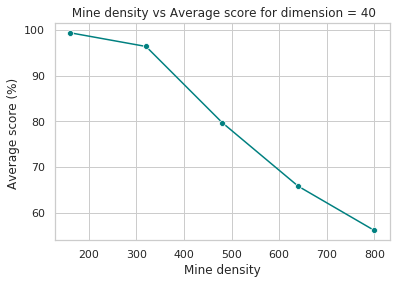

In [0]:
average_score(40)